# Advanced Customer Analytics
Ioannis Michalopoulos - p3352314

Project 1



# Dataset Information


---


The Movies Dataset



https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Read the CSV file about ratings
ratings_source = pd.read_csv("ratings.csv")

In [4]:
# Read the CSV file about movies
movies_source = pd.read_csv("movies_metadata.csv")

<ipython-input-4-9d49364a81ea>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_source = pd.read_csv("movies_metadata.csv")


# Preprocessing-EDA

## Split genres to columns

In this section, we focus on extracting and identifying the unique genres stored in dictionary format. We eliminate any attributes unrelated to genres and assign the genres to each movie in a structured and organized format.

In [5]:
# Function to extract unique genres
import ast

def extract_unique_genres(genres_column):
    unique_genres = set()  # Use a set to ensure uniqueness
    for entry in genres_column:
        # Convert the string to a list of dictionaries
        genres_list = ast.literal_eval(entry)
        for genre in genres_list:
            unique_genres.add(genre['name'])  # Add genre names to the set
    return list(unique_genres)  # Convert set back to a list

# Apply the function to the 'genres' column
unique_genres = extract_unique_genres(movies_source['genres'])

# Print the unique genres
print("Unique Genres:", unique_genres)

Unique Genres: ['Adventure', 'Crime', 'Rogue State', 'Thriller', 'BROSTA TV', 'Western', 'Animation', 'Romance', 'Vision View Entertainment', 'Sentai Filmworks', 'The Cartel', 'Pulser Productions', 'TV Movie', 'Odyssey Media', 'Foreign', 'Horror', 'Mystery', 'Comedy', 'Music', 'History', 'Aniplex', 'Action', 'Mardock Scramble Production Committee', 'Documentary', 'Fantasy', 'Drama', 'Family', 'GoHands', 'War', 'Carousel Productions', 'Telescene Film Group Productions', 'Science Fiction']


In [6]:
# A curated list of valid genres
valid_genres = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Foreign'
]

In [7]:
# Function to check if a specific genre exists for a movie
def genre_exists(genres, genre_to_check):
    genres_list = ast.literal_eval(genres)  # Convert string to list of dicts
    return int(any(genre['name'] == genre_to_check for genre in genres_list))

# Add a column for each valid genre
for genre in valid_genres:
    movies_source[genre] = movies_source['genres'].apply(lambda x: genre_exists(x, genre))


In [8]:
print(movies_source['original_title'].iloc[0])
print(movies_source['genres'].iloc[0])
print(movies_source[ valid_genres].iloc[0])


Toy Story
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
Action             0
Adventure          0
Animation          1
Comedy             1
Crime              0
Documentary        0
Drama              0
Family             1
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
Foreign            0
Name: 0, dtype: int64


## Runtime buckets

This section categorizes the runtime of movies into two groups: "Short" for runtimes less than 1 hour and 45 minutes (under 105 minutes), and "Long" for runtimes 1 hour and 45 minutes or longer (105 minutes and above). A new column called runtime_category is added to the dataset by applying this categorization function to the runtime column.

In [9]:
#movies_source = movies_source.drop(columns=['runtime_category'])

In [10]:
import pandas as pd


# Define a function to categorize runtime
def categorize_runtime(runtime):
    if 0 <= runtime < 105:
        return "Short" #<1h45m
    elif runtime >=105 :
        return "Long" #>=1h45m
    else:
        return "Short"  # Handle any unexpected values

# Apply the function to create a new column
movies_source['runtime_category'] = movies_source['runtime'].apply(categorize_runtime)


In [11]:
# Display the updated DataFrame
movies_source[['original_title','runtime_category','runtime']].head()

,original_title,runtime_category,runtime
0,Toy Story,Short,81.0
1,Jumanji,Short,104.0
2,Grumpier Old Men,Short,101.0
3,Waiting to Exhale,Long,127.0
4,Father of the Bride Part II,Long,106.0


## Movie's Language


This section creates a new column, Language, based on the values in the original_language column. If the original_language is 'en', it assigns the value 'English'; otherwise, it assigns 'Non-English'. This transformation helps classify movies into English and Non-English categories.

In [12]:
# Create a new column 'Language' based on the 'original_language' column
movies_source['Language'] = movies_source['original_language'].apply(lambda x: 'English' if x == 'en' else 'Non-English')



##Movie's Decade


This section organizes movie data based on their release dates. It identifies the release year for each movie and categorizes them into specific time periods, such as "before 1990," "1990-1999," "2000-2009," and "after 2010," making it easier to analyze trends over time.

In [13]:
#movies_source = movies_source.drop(columns=['decade'])

In [14]:
import pandas as pd

# Convert release_date to datetime, setting invalid entries to NaT
movies_source['release_date'] = pd.to_datetime(movies_source['release_date'], errors='coerce')

# Extract the year
movies_source['year'] = movies_source['release_date'].dt.year


# Define a function to categorize runtime
def categorize_decade(year):
    if 0 <= year < 1990:
        return "before_1990"
    elif year >=1990 and year <2000 :
        return "1990-1999"
    elif year >=2000 and year <2010 :
        return "2000-2009"
    elif year >=2010 :
        return "after_2010"
    # else:
    #     return "NA"  # Handle any unexpected values

# Apply the function to create a new column
movies_source['decade'] = movies_source['year'].apply(categorize_decade)

## Movies Features

The columns that we keep for the analysis

In [15]:
# Initial features
movies_source.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'Foreign', 'runtime_category',
       'Language', 'year', 'decade'],
      dtype='object')

In [16]:
#budget,revenue: Out  36573 0 values
#runtime was replaced by runtime_category
#original_language was replaced by Language
movies_source[['id','original_title','Language','popularity','decade','runtime_category','vote_average']+valid_genres].head(10)

,id,original_title,Language,popularity,decade,runtime_category,vote_average,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign
0,862,Toy Story,English,21.946943,1990-1999,Short,7.7,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,English,17.015539,1990-1999,Short,6.9,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,English,11.7129,1990-1999,Short,6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,31357,Waiting to Exhale,English,3.859495,1990-1999,Long,6.1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,11862,Father of the Bride Part II,English,8.387519,1990-1999,Long,5.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,949,Heat,English,17.924927,1990-1999,Long,7.7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,11860,Sabrina,English,6.677277,1990-1999,Long,6.2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,45325,Tom and Huck,English,2.561161,1990-1999,Short,5.4,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,9091,Sudden Death,English,5.23158,1990-1999,Long,5.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,710,GoldenEye,English,14.686036,1990-1999,Long,6.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
movies_data=movies_source[['id','original_title','Language','popularity','decade','runtime_category','vote_average']+valid_genres].copy()

In [18]:
movies_data.head()

,id,original_title,Language,popularity,decade,runtime_category,vote_average,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign
0,862,Toy Story,English,21.946943,1990-1999,Short,7.7,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,English,17.015539,1990-1999,Short,6.9,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,English,11.7129,1990-1999,Short,6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,31357,Waiting to Exhale,English,3.859495,1990-1999,Long,6.1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,11862,Father of the Bride Part II,English,8.387519,1990-1999,Long,5.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Reviews data

In this section, we combine each user's ratings with the corresponding movie attributes identified earlier. To streamline the process, we use only the first 100,000 records from the ratings dataset. Additionally, we create a new column, class_rating, which serves as the target for the binary classifier. Ratings below 3.5 are labeled as 0, while ratings of 3.5 or higher are labeled as 1, enabling the model to distinguish between low and high ratings.

In [19]:
ratings_source_new=ratings_source.head(100000).copy() #keep first 100.000 records
#del ratings_source

In [20]:
# Add 'class_rating'
ratings_source_new['class_rating'] = ratings_source_new['rating'].apply(lambda x: 1 if x >= 3.5 else 0)

In [21]:
# Convert the 'movieId' column in ratings_source_new to object
ratings_source_new['movieId'] = ratings_source_new['movieId'].astype(str)

In [22]:
# Perform the inner join to bring all data together and remove the movies in reviews that dont exist in movies dataset
merged_df = pd.merge(
    ratings_source_new,         # Left DataFrame
    movies_data,                # Right DataFrame
    left_on='movieId',          # Column in ratings_source_new
    right_on='id',              # Column in movies_data
    how='inner'                 # Join type: inner
)

In [23]:
# Calculate the value counts of userId
user_counts = merged_df['userId'].value_counts()

# Identify users with at least 30 occurrences
users_with_30_or_more = user_counts[user_counts >= 30].index

# Filter the DataFrame to keep only these users
df_reviews = merged_df[merged_df['userId'].isin(users_with_30_or_more)]

In [24]:
df_reviews.head() #movieId and id are the same field

,userId,movieId,rating,timestamp,class_rating,id,original_title,Language,popularity,decade,runtime_category,vote_average,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Foreign
1,11,110,3.5,1231676989,1,110,Trois couleurs : Rouge,Non-English,7.832755,1990-1999,Short,7.8,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
3,24,110,5.0,979870012,1,110,Trois couleurs : Rouge,Non-English,7.832755,1990-1999,Short,7.8,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
5,30,110,5.0,967986311,1,110,Trois couleurs : Rouge,Non-English,7.832755,1990-1999,Short,7.8,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
6,33,110,3.0,840451812,0,110,Trois couleurs : Rouge,Non-English,7.832755,1990-1999,Short,7.8,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
7,34,110,5.0,1498760804,1,110,Trois couleurs : Rouge,Non-English,7.832755,1990-1999,Short,7.8,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0


In [25]:
# Handle null values in decade, by replacing them with the most common one (only 16 values)
# Find the most common value (mode) in the 'decade' column
most_common_decade = df_reviews['decade'].mode()[0]

# Fill null (NaN) values with the most common value
df_reviews['decade'].fillna(most_common_decade, inplace=True)

<ipython-input-25-bef229e29f04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['decade'].fillna(most_common_decade, inplace=True)


In [26]:
#change type in popularity field
df_reviews['popularity']=df_reviews['popularity'].astype(float)

<ipython-input-26-cb854450ebd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['popularity']=df_reviews['popularity'].astype(float)


In [27]:
df_reviews.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'class_rating', 'id',
       'original_title', 'Language', 'popularity', 'decade',
       'runtime_category', 'vote_average', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'Foreign'],
      dtype='object')

In [28]:
most_common_genres=df_reviews[valid_genres].sum().sort_values(ascending=False).index.tolist()[:11]
print(most_common_genres)

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Horror', 'Fantasy']


# Binary Classifier

## Prepare the input for the classifier

In this section, we prepare the data to be used as input for the classifier. We start by focusing only on the most frequent genres, removing less common ones to simplify the model and retain the most important features. The data is then split into training and testing sets, ensuring that 80% of each user's ratings are kept in the training set and 20% in the test set. A key step in this process is creating user attributes, which are not provided initially. These attributes are generated based on each user's historical interactions with movies, using only data from the training set. This ensures the classifier has meaningful and user-specific features to work with.

In [29]:
#Dataset that will feed the model
# *** if we need to remove 'movieId','original_title'
# removed also 'popularity','vote_average'
df=df_reviews[['userId','Language','decade','runtime_category']+most_common_genres+['rating','class_rating']].copy()

In [30]:
# Assuming df is your original DataFrame and the columns to encode are listed
columns_to_encode = ['Language', 'decade', 'runtime_category']

# Perform one-hot encoding without dropping any categories
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=False)

# Identify the one-hot-encoded columns by filtering on their names (based on the prefix)
encoded_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in columns_to_encode)]

# Apply `astype(int)` only to the one-hot-encoded columns
df[encoded_columns] = df[encoded_columns].astype(int)

In [31]:
df.head()

,userId,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Science Fiction,Mystery,Horror,Fantasy,rating,class_rating,Language_English,Language_Non-English,decade_1990-1999,decade_2000-2009,decade_after_2010,decade_before_1990,runtime_category_Long,runtime_category_Short
1,11,1,0,0,0,1,0,0,0,1,0,0,3.5,1,0,1,1,0,0,0,0,1
3,24,1,0,0,0,1,0,0,0,1,0,0,5.0,1,0,1,1,0,0,0,0,1
5,30,1,0,0,0,1,0,0,0,1,0,0,5.0,1,0,1,1,0,0,0,0,1
6,33,1,0,0,0,1,0,0,0,1,0,0,3.0,0,0,1,1,0,0,0,0,1
7,34,1,0,0,0,1,0,0,0,1,0,0,5.0,1,0,1,1,0,0,0,0,1


In [32]:
#split the dataset in train(80% of each user's records) and test(20% os each user's records)

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

def split_dataframe(df, user_col, test_size=0.2):
    train_list = []
    test_list = []

    for user_id, group in df.groupby(user_col):
        train, test = train_test_split(group, test_size=test_size, random_state=42)
        train_list.append(train)
        test_list.append(test)

    train_df = pd.concat(train_list).reset_index(drop=True)
    test_df = pd.concat(test_list).reset_index(drop=True)

    return train_df, test_df

# Example usage
pre_train_df, pre_test_df = split_dataframe(df, user_col='userId')

In [33]:
import pandas as pd


#features that wil characterize the user attributes
features=list(set(pre_train_df.columns) - {'userId','class_rating','rating'})

# Initialize an empty DataFrame to store the results
user_features = pd.DataFrame()

for feature in features:
    # Calculate the average rating for the feature for each user
    avg_ratings = (
        pre_train_df[pre_train_df[feature] == 1][['userId', 'rating']]
        .groupby('userId')
        .mean()
        .rename(columns={'rating': f'user_{feature}'})  # Rename the column to be feature-specific
    )

    # Merge the results into the `user_features` DataFrame
    if user_features.empty:
        user_features = avg_ratings
    else:
        user_features = user_features.join(avg_ratings, how='outer')

# Reset the index to make userId a column again
user_features = user_features.reset_index()

# Fill any missing values with the median of each row
user_features = user_features.apply(lambda row: row.fillna(row.median()), axis=1)



In [34]:
user_features.head()

,userId,user_Adventure,user_Mystery,user_Crime,user_Horror,user_Comedy,user_Action,user_Thriller,user_Fantasy,user_Drama,user_decade_after_2010,user_Romance,user_runtime_category_Long,user_Language_English,user_runtime_category_Short,user_decade_2000-2009,user_Language_Non-English,user_decade_before_1990,user_decade_1990-1999,user_Science Fiction
0,8.0,3.333333,2.933333,3.250000,3.166667,2.500000,3.181818,3.272727,3.250000,2.758621,2.933333,2.875000,2.812500,2.846154,2.920000,2.777778,2.933333,2.933333,3.000000,2.8
1,11.0,3.555556,3.916667,3.571429,2.666667,3.184211,3.437500,3.666667,3.500000,3.375000,3.250000,3.416667,3.260000,3.243243,3.362069,3.157895,3.470588,3.464286,3.423077,3.4
2,12.0,3.578947,4.000000,3.950000,4.100000,3.892857,3.391304,3.760000,3.500000,3.883333,3.789474,3.789474,3.491228,3.691358,4.039216,3.875000,3.925926,3.641026,3.724138,3.5
3,15.0,4.571429,3.916667,3.625000,1.500000,3.562500,3.708333,3.666667,4.071429,3.897059,4.250000,4.111111,4.173077,3.920000,3.648649,4.115385,3.653846,3.692308,3.555556,3.9
4,16.0,4.400000,4.000000,4.785714,4.214286,4.500000,4.500000,4.428571,4.625000,4.500000,4.500000,4.700000,4.500000,4.558824,4.521739,4.600000,4.333333,4.500000,4.333333,4.5


In [35]:
df_train = pd.merge(pre_train_df, user_features, how='left', on=['userId', 'userId'])
df_test = pd.merge(pre_test_df, user_features, how='left', on=['userId', 'userId'])

In [36]:
usr_feat = [col for col in df_train.columns if col.startswith('user_') and col != 'userId']
movies_features = [col for col in df_train.columns if col not in set(usr_feat + ['userId', 'class_rating', 'rating'])]

In [37]:
X_train = df_train[usr_feat + movies_features]
y_train = df_train['class_rating']

X_test = df_test[usr_feat + movies_features]
y_test = df_test['class_rating']

## Build and Train the classifier


In this section, we train a Random Forest classifier to predict binary outcomes. The model is trained using the pre-split training dataset and evaluated on the test dataset.

Once the model is trained:

* Predictions are made for the test dataset, including both binary predictions
and probabilities for the positive class.
* The model's performance is evaluated using two key metrics:
   * Accuracy: The proportion of correctly predicted instances.
   * AUC (Area Under the Curve): A measure of the model's ability to distinguish between classes.

Additionally, a confusion matrix is computed to provide detailed insight into the model's predictions, highlighting the number of true positives, true negatives, false positives, and false negatives. The confusion matrix is visualized as a heatmap to better interpret the classification results.

Accuracy (Random Forest): 0.6557269012785027
AUC (Random Forest): 0.70421819137076


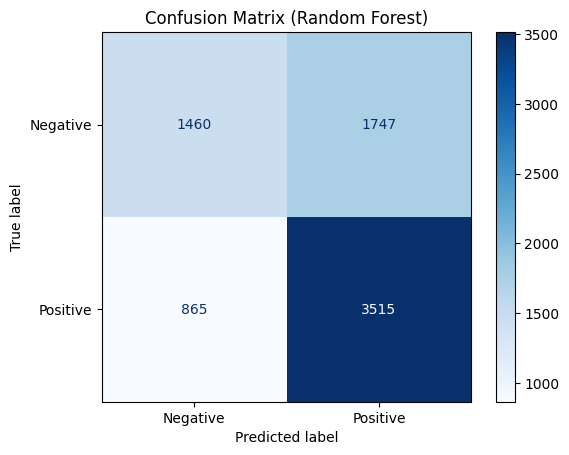

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=6)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
y_pred_rf = rf_model.predict(X_test)  # Binary predictions

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"AUC (Random Forest): {auc_rf}")

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Negative', 'Positive'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Explainability

Using LIME, we create a function to explain the reasoning behind a predicted outcome, whether positive or negative. The function provides a clear breakdown of how each parameter influenced the final decision, visualized through a plot that highlights the contribution of each feature to the model's prediction.

In [39]:
pip install lime

In [40]:
import lime.lime_tabular
import matplotlib.patches as mpatches

In [41]:
def plot_feature_contributions_rf(idx, rf_model=rf_model, X_train=X_train, X_test=X_test, y_test=y_test, y_pred=y_pred_rf):
#def plot_feature_contributions_rf(idx, rf_model, X_train, X_test, y_test, y_pred):
    """
    Plots the feature contributions for a given instance in X_test using LIME, tailored for Random Forest.

    Parameters:
        idx (int): Index of the instance in X_test to explain.
        rf_model: Trained Random Forest model.
        X_train (pd.DataFrame): Training dataset used for LIME initialization.
        X_test (pd.DataFrame): Test dataset containing the instance to explain.
        y_test (pd.Series): Actual labels for the test set.
        y_pred (list or np.array): Predicted labels for the test set.
    """
    # Initialize the LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.to_numpy(),
        feature_names=X_train.columns.tolist(),
        class_names=['Negative', 'Positive'],  # Adjust class names as per your dataset
        mode='classification'
    )

    # Select the instance to explain
    instance = X_test.iloc[idx].to_numpy()

    # Generate the explanation
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=rf_model.predict_proba,  # Use predict_proba for probability predictions
        num_features=20  # Adjust the number of features to display in the explanation
    )

    # Extract explanation as a list of feature contributions
    explanation = exp.as_list()

    # Convert the explanation to a DataFrame
    explanation_df = pd.DataFrame(explanation, columns=['Feature', 'Contribution'])

    # Process features
    def process_feature(feature, instance_values):
        """
        Processes the feature:
        - If it starts with "user_", keep it as it is.
        - Otherwise, convert it to a categorical format: "Feature = 0" or "Feature = 1".
        """
        if feature.startswith("user_"):
            return feature  # Keep user-specific features as-is
        else:
            # Extract the base feature name (before any condition)
            base_feature = feature.split(" ")[0].strip()
            # Get the actual value of this feature from the instance
            actual_value = instance_values.get(base_feature, None)
            if actual_value is not None:
                return f"{base_feature} = {int(actual_value)}"
            else:
                return feature  # If feature is not found, leave it as-is

    # Create a dictionary of instance feature values for lookup
    instance_values = X_test.iloc[idx].to_dict()

    # Apply processing to features
    explanation_df['Feature'] = explanation_df['Feature'].apply(lambda x: process_feature(x, instance_values))

    # Sort by absolute contribution for better visualization
    explanation_df['Abs_Contribution'] = explanation_df['Contribution'].abs()
    explanation_df = explanation_df.sort_values('Abs_Contribution', ascending=True)

    # Assign colors: green for positive, red for negative
    explanation_df['Color'] = explanation_df['Contribution'].apply(lambda x: 'green' if x > 0 else 'red')

    # Create a horizontal bar plot with color-coding
    plt.figure(figsize=(12, 8))
    bars = plt.barh(
        explanation_df['Feature'],
        explanation_df['Contribution'],
        color=explanation_df['Color'],
        align='center',
        alpha=0.8
    )

    # Determine the prediction for this instance
    prediction_label = 'Positive Rating' if y_pred[idx] == 1 else 'Negative Rating'

    # Add labels and title
    plt.xlabel('Contribution to Prediction')
    plt.ylabel('Feature')
    plt.title(f'Feature Contributions for Instance {idx} and Prediction: ({prediction_label})')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

    # Add values on the bars, placing them close to x=0
    for bar in bars:
        width = bar.get_width()
        # Place text near the x=0 axis
        x_position = 0.005 if width > 0 else -0.005  # Small offset from 0
        alignment = 'left' if width > 0 else 'right'
        plt.text(
            x_position,
            bar.get_y() + bar.get_height() / 2,
            f'{width:.3f}',  # Format the value to 3 decimal places
            va='center',
            ha=alignment,  # Align text based on the direction of the bar
            fontsize=10
        )

    # Add a legend
    red_patch = mpatches.Patch(color='red', label='Negative Rating')
    green_patch = mpatches.Patch(color='green', label='Positive Rating')
    plt.legend(handles=[green_patch, red_patch], loc='upper right')

    # Show the plot
    plt.show()

    # Print instance details
    # print(f"Instance {idx} in the test set:")
    # print(X_test.iloc[idx])
    # print(f"Actual rating: {y_test.iloc[idx]}")
    # print(f"Prediction: {y_pred[idx]}")


In [42]:
# Get the indexes of all the 0s in y_pred_rf
indexes_of_zeros = [index for index, value in enumerate(y_pred_rf) if value == 0]
print(indexes_of_zeros)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 233, 236, 238, 240, 241, 242, 243, 244, 245, 249, 250, 252, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 545, 546, 547, 549, 550, 551, 553, 554, 557, 558, 559, 560, 571, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 636, 637, 638, 639, 640, 641, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 796, 797, 799, 800, 802, 804, 815, 816, 817, 819, 822, 825, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


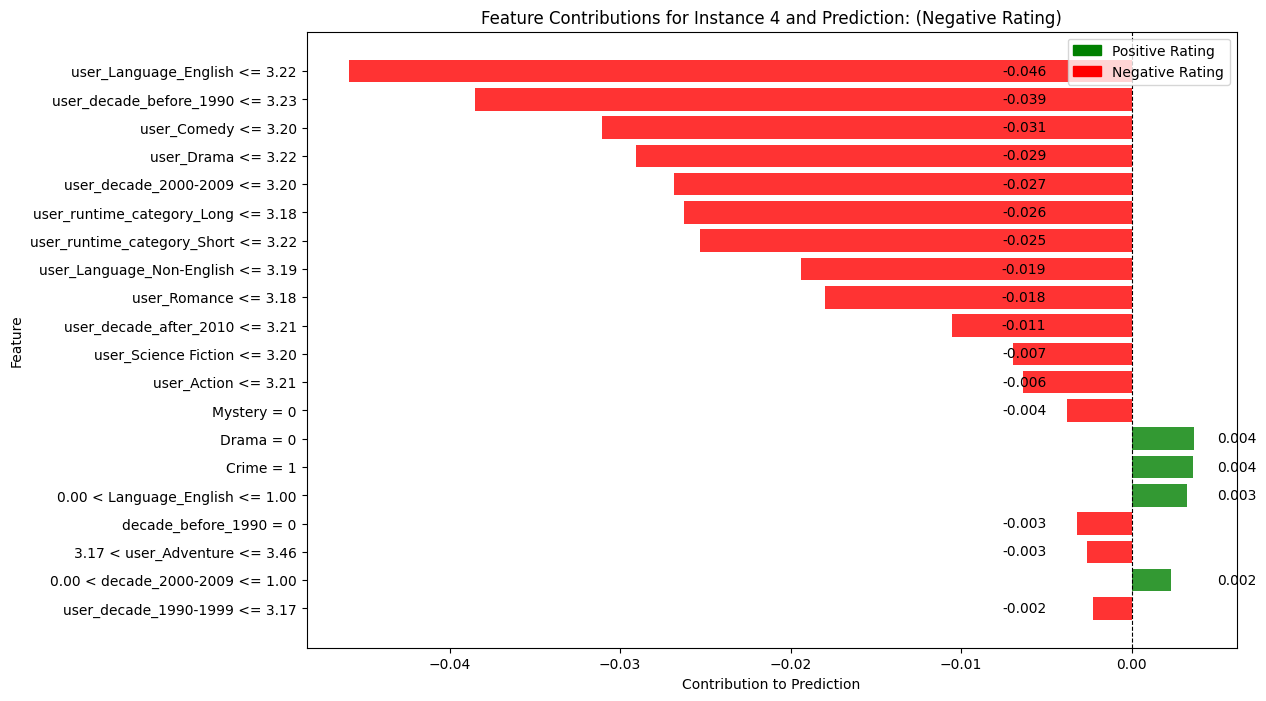

In [43]:
plot_feature_contributions_rf(idx=4)   # Index of the test instance to explain

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


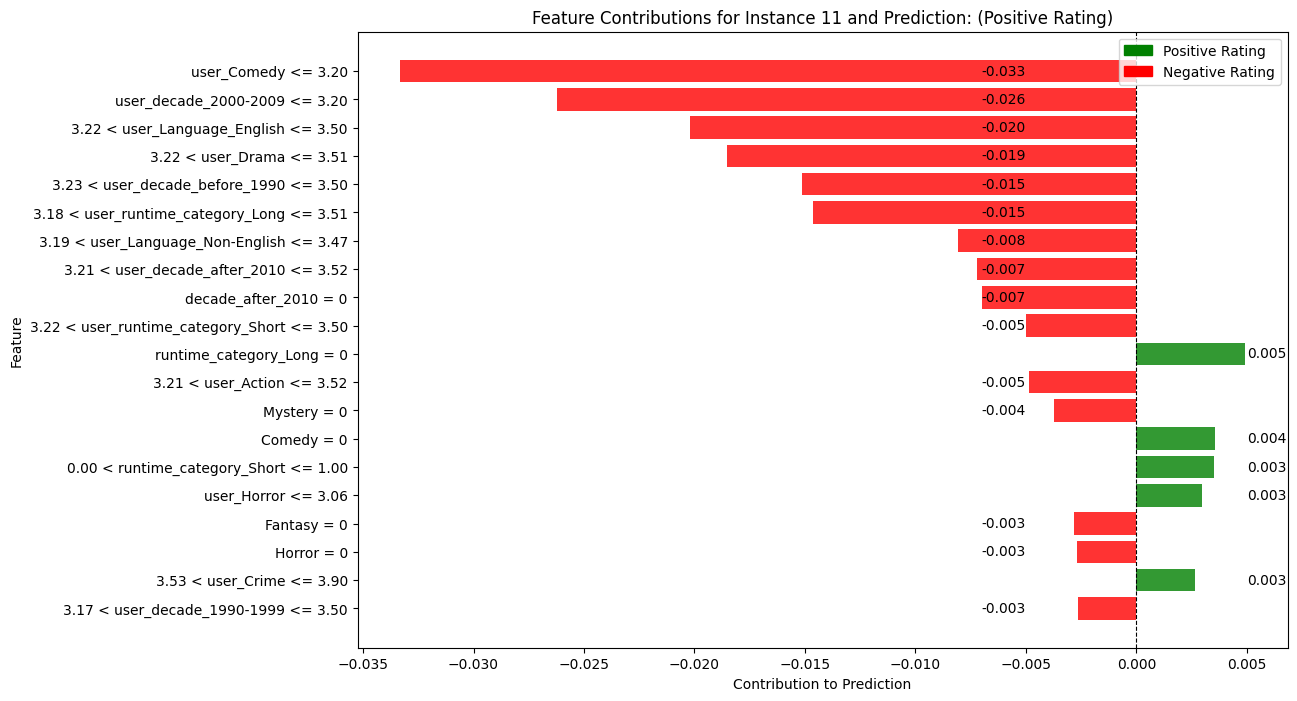

In [44]:
plot_feature_contributions_rf(idx=11)

# Counterfactuals

Using DiCE, we generate counterfactuals to illustrate the specific changes needed, according to the model, to alter the prediction from one class to the other. This helps understand what adjustments in the input features could lead to a different outcome.

In [45]:
pip install dice-ml

In [46]:
# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

In [47]:
# Step 1: dice_ml.Data
d = dice_ml.Data(dataframe=df_train[usr_feat + movies_features+['class_rating']],
                 continuous_features=usr_feat,
                 outcome_name='class_rating')

In [48]:
# df_train[usr_feat + movies_features+['class_rating']].head()

In [49]:
# Using sklearn backend
m = dice_ml.Model(model=rf_model, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")

In [50]:
e1 = exp.generate_counterfactuals(X_test[0:1], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

Query instance (original outcome : 0)


,user_Adventure,user_Mystery,user_Crime,user_Horror,user_Comedy,user_Action,user_Thriller,user_Fantasy,user_Drama,user_decade_after_2010,user_Romance,user_runtime_category_Long,user_Language_English,user_runtime_category_Short,user_decade_2000-2009,user_Language_Non-English,user_decade_before_1990,user_decade_1990-1999,user_Science Fiction,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Science Fiction,Mystery,Horror,Fantasy,Language_English,Language_Non-English,decade_1990-1999,decade_2000-2009,decade_after_2010,decade_before_1990,runtime_category_Long,runtime_category_Short,class_rating
0,3.333333,2.933333,3.25,3.166667,2.5,3.181818,3.272727,3.25,2.758621,2.933333,2.875,2.8125,2.846154,2.92,2.777778,2.933333,2.933333,3.0,2.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1)


,user_Adventure,user_Mystery,user_Crime,user_Horror,user_Comedy,user_Action,user_Thriller,user_Fantasy,user_Drama,user_decade_after_2010,user_Romance,user_runtime_category_Long,user_Language_English,user_runtime_category_Short,user_decade_2000-2009,user_Language_Non-English,user_decade_before_1990,user_decade_1990-1999,user_Science Fiction,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Science Fiction,Mystery,Horror,Fantasy,Language_English,Language_Non-English,decade_1990-1999,decade_2000-2009,decade_after_2010,decade_before_1990,runtime_category_Long,runtime_category_Short,class_rating
0,3.6,-,-,-,2.7468196,-,-,-,-,-,5.1,4.5834621,4.0136818,-,3.7874226,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,-,-,3.9569678,-,4.5,-,4.4622089,-,-,-,4.7,3.4,4.4,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0


# Final Function

We create a function that takes as input a specific record containing information about a user's traits combined with a random movie's traits. The function explains the classifier's decision for this record. If the decision is negative, it generates and displays counterfactuals, illustrating the changes needed to alter the prediction to a positive outcome. Attributes starting with "user" represent the user's traits, which are calculated as the average rating (out of 5) the user has given for each category, while the remaining attributes correspond to the movie's characteristics.

In [51]:
def explain_and_generate_counterfactuals(user_rating_index):
    """
    Explains the prediction for the given user_rating_index and generates counterfactuals if the prediction is 0.

    Parameters:
        user_rating_index (int): Index of the user rating in the test dataset.
    """
    # Check if the prediction is 0
    if y_pred_rf[user_rating_index] == 0:
        print("Explanation:")
        # Plot feature contributions for the given index
        plot_feature_contributions_rf(idx=user_rating_index)

        print("Counterfactuals:")
        # Generate counterfactuals for the given index
        e1 = exp.generate_counterfactuals(
            query_instances=X_test[user_rating_index:(user_rating_index + 1)],
            total_CFs=2,
            desired_class="opposite"
        )
        # Visualize the counterfactuals
        e1.visualize_as_dataframe(show_only_changes=True)
    else:
        print(f"Prediction for user_rating_index={user_rating_index} is Positive. No counterfactuals generated.")


Explanation:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


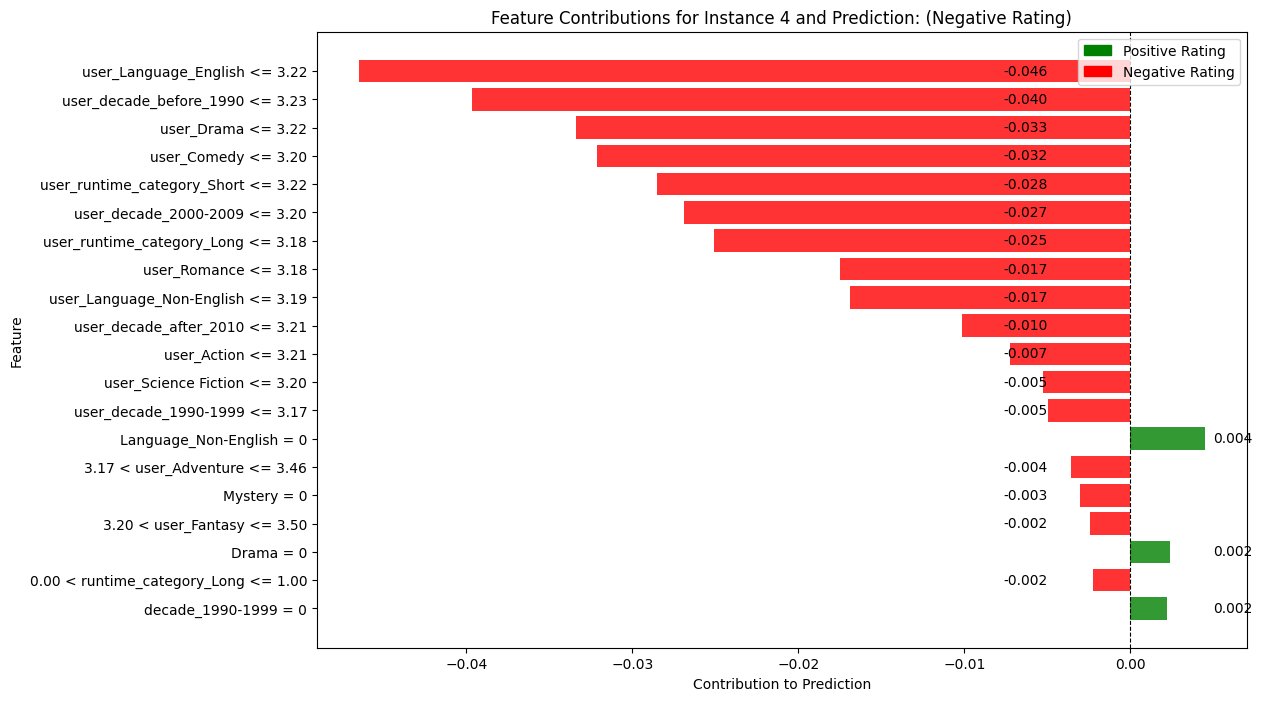

Counterfactuals:


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

Query instance (original outcome : 0)


,user_Adventure,user_Mystery,user_Crime,user_Horror,user_Comedy,user_Action,user_Thriller,user_Fantasy,user_Drama,user_decade_after_2010,user_Romance,user_runtime_category_Long,user_Language_English,user_runtime_category_Short,user_decade_2000-2009,user_Language_Non-English,user_decade_before_1990,user_decade_1990-1999,user_Science Fiction,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Science Fiction,Mystery,Horror,Fantasy,Language_English,Language_Non-English,decade_1990-1999,decade_2000-2009,decade_after_2010,decade_before_1990,runtime_category_Long,runtime_category_Short,class_rating
0,3.333333,2.933333,3.25,3.166667,2.5,3.181818,3.272727,3.25,2.758621,2.933333,2.875,2.8125,2.846154,2.92,2.777778,2.933333,2.933333,3.0,2.8,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1)


,user_Adventure,user_Mystery,user_Crime,user_Horror,user_Comedy,user_Action,user_Thriller,user_Fantasy,user_Drama,user_decade_after_2010,user_Romance,user_runtime_category_Long,user_Language_English,user_runtime_category_Short,user_decade_2000-2009,user_Language_Non-English,user_decade_before_1990,user_decade_1990-1999,user_Science Fiction,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Science Fiction,Mystery,Horror,Fantasy,Language_English,Language_Non-English,decade_1990-1999,decade_2000-2009,decade_after_2010,decade_before_1990,runtime_category_Long,runtime_category_Short,class_rating
0,-,-,-,-,-,-,-,-,4.7934069,-,-,-,4.2431683,3.3268901,-,3.7346011,4.3,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,4.3247108,-,-,-,4.5022191,4.0,-,-,-,4.3450844,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0


In [52]:
explain_and_generate_counterfactuals(4)